In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
dfx=pd.read_csv('weightedX.csv')
dfy=pd.read_csv('weightedY.csv')
dfx.describe()

,1.2421
count,99.000000
mean,4.041444
std,4.804161
min,-4.978000
25%,0.060932
50%,3.783500
75%,8.220750
max,11.853000


In [67]:
x=dfx.values
y=dfy.values

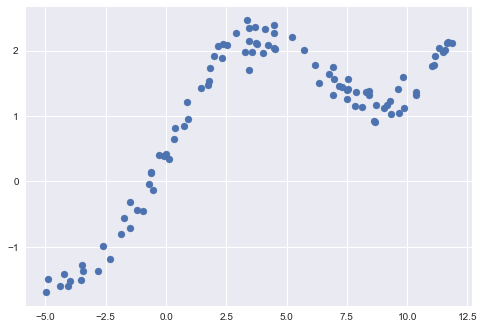

In [69]:
#ploting Non-linear Data
plt.style.use('seaborn')
plt.scatter(x,y)


In [27]:
#NormaliZation of Data
X=(x-np.mean(x,axis=0))/np.std(x,axis=0)


In [33]:
#Create a W(m*m) diagonal matrix 
def getW(qp,X,tau):
    m=X.shape[0]
    w=np.mat(np.eye(m))
    for i in range(m):
        xi=X[i]
        x=qp
        w[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return w

In [35]:
X = np.mat(X)
Y = np.mat(y)
W = getW(-1,X,100)
print(W.shape)
print(W)


(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [40]:
def predict(X,y,qp,tau):
    m=X.shape[0]
    ones = np.ones((m,1))
    X_ = np.hstack((X,ones))
    qx = np.mat([qp,1])
    W = getW(qx,X_,tau)
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred
    

In [49]:
theta,pred=predict(X,y,13.0,1.0)
pred

matrix([[25.3904565]])

In [53]:
   #ploting the graph for diff X_test (query points) with diff tau values
    def plotPre(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])  
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    plt.title("Tau %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()


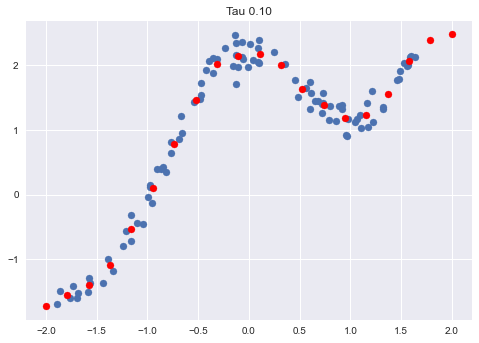

In [55]:
plotPre(.1)

In [64]:
tau=np.array([0.1,0.3,0.6,1,1.5])
tau

array([0.1, 0.3, 0.6, 1. , 1.5])

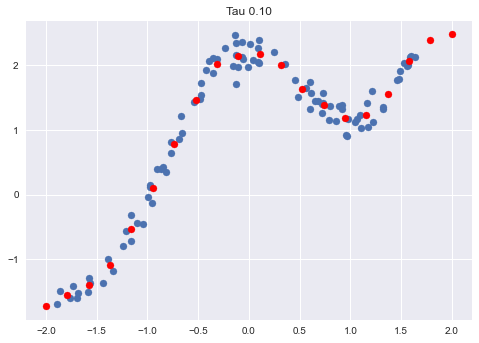

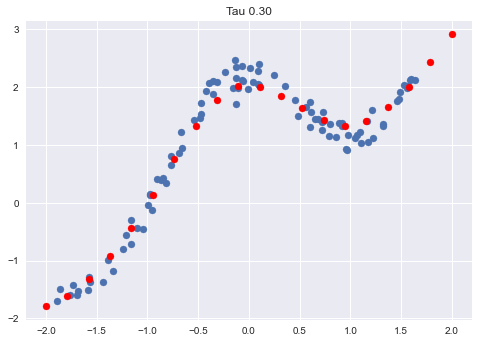

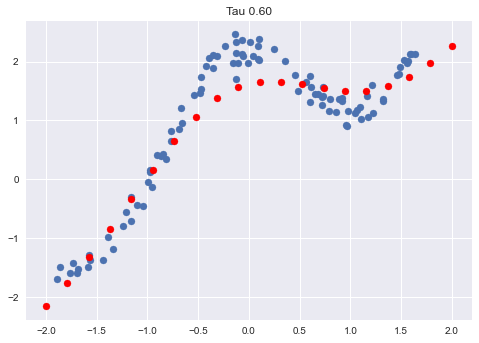

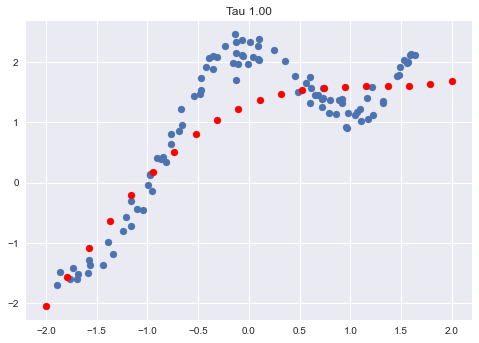

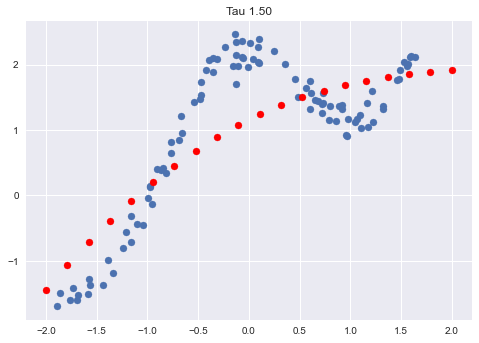

In [66]:
#As the tau value increases it almost drow staigth line(Linear Regression)
for i in tau:
    plotPre(i)